# NLP
Natural language processing (NLP) is the ability of a computer program to understand human language as it is spoken.<br>
The development of NLP applications is challenging because computers traditionally require humans to "speak" to them in a programming language that is precise, unambiguous and highly structured, or through a limited number of clearly enunciated voice commands. Human speech, however, is not always precise -- it is often ambiguous and the linguistic structure can depend on many complex variables, including slang, regional dialects and social context.

# Dataset

Data source :https://archive.ics.uci.edu/ml/machine-learning-databases/00228/ <br>

The files contain one message per line. Each line is composed by two columns: one with label (ham or spam) and other with the raw text.

# Problem Statement

We're going to classify spam versus non spam SMS.There's an attempt to make our own spam detector.

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing dataset

In [2]:
dataset=pd.read_csv('SMSSpamCollection',delimiter='\t', quoting=3)

In [3]:
dataset.head()

,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [4]:
dataset=pd.read_csv('SMSSpamCollection',delimiter='\t', quoting=3,names=['Names','SMS'])
dataset.head()

,Names,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
dataset.shape

(5574, 2)

In [6]:
dataset.groupby('Names').describe()

SMS                                                               
      count unique                                                top freq
Names                                                                     
ham    4827   4518                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

### Dealing with categorical variables

In [7]:
dataset['Labels']=dataset.Names.map({'ham':0 , 'spam':1})

In [8]:
dataset.head()

,Names,SMS,Labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


## Cleaning text

In [9]:
import re
dataset['SMS'][1] # checking 1st review

'Ok lar... Joking wif u oni...'

In [10]:
sms=re.sub('[^a-zA-z]',' ' , dataset['SMS'][1])
sms

'Ok lar    Joking wif u oni   '

### Converting to lower case letters

In [11]:
sms= sms.lower()
sms

'ok lar    joking wif u oni   '

In [12]:
type(sms)

str

### Splitting words

In [13]:
sms = sms.split()

In [14]:
sms

['ok', 'lar', 'joking', 'wif', 'u', 'oni']

In [15]:
type(sms)

list

### Removing extra words

In [16]:
import nltk
from nltk.corpus import stopwords
sms= [word for word in sms if not word in set(stopwords.words('english'))]

In [17]:
sms

['ok', 'lar', 'joking', 'wif', 'u', 'oni']

### Stemming

In [18]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
sms= [ps.stem(word) for word in sms if not word in set(stopwords.words('english'))]

In [19]:
sms

['ok', 'lar', 'joke', 'wif', 'u', 'oni']

### Change list back to string

In [20]:
sms= ' '.join(sms)
sms

'ok lar joke wif u oni'

### Cleaning whole dataframe

In [21]:
corpus = [] # defining corpus
for i in range(0, len(dataset['SMS'])): # giving range of values from 0 to 1000
    sms = re.sub('[^a-zA-Z]', ' ', dataset['SMS'][i]) # using i for all values instead of 1 column
    sms = sms.lower()
    sms = sms.split()
    ps = PorterStemmer()
    stopword_set = set(stopwords.words('english'))
    sms = [ps.stem(word) for word in sms if not word in stopword_set]
    sms = ' '.join(sms)
    corpus.append(sms) # finally attach all these cleaned values to corpus directory 

### Bag of Words model for sparse matrix

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500) 
X = cv.fit_transform(corpus).toarray()

In [23]:
type(X)

numpy.ndarray

In [24]:
y=dataset.Labels.values # y is integer now

## Splitting the dataset into the Training set and Test set

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

## Fitting classifier to the Training set

In [26]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

C:\Users\Humza\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [27]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Comparing y-predict and y test results

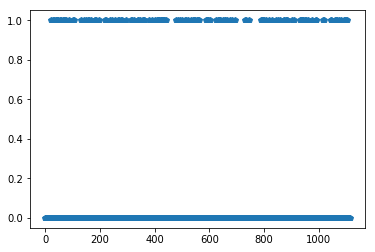

In [28]:
import matplotlib.pyplot as plt
plt.plot(y_pred, "p")

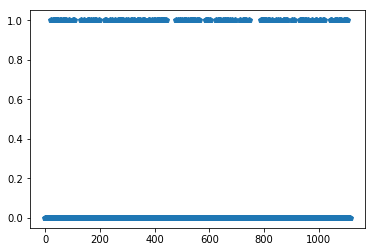

In [29]:
plt.plot(y_test, "p")

Visually both plots look same. It seems like a good prediction result. Let's make it confirmed.

## Making the confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.<br>
Key matrix elements are:<br>
true positives (TP): These are cases in which we predicted yes (they have the purchased), and they do have the purchases.<br>
true negatives (TN): We predicted no, and they don't have purchased.<br>
false positives (FP): We predicted yes, but they have actually not the purchased. (Also known as a "Type I error.")<br>
false negatives (FN): We predicted no, but they actually ourchased. (Also known as a "Type II error.")<br>

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[948,   2],
       [ 29, 136]], dtype=int64)

Correct predictions=948+136 <br>
Incorrect predictions=29+2

## Checking accuracy score

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9721973094170404

In [32]:
from sklearn.metrics import classification_report

In [33]:
print (classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.97      1.00      0.98       950
          1       0.99      0.82      0.90       165

avg / total       0.97      0.97      0.97      1115

